<a href="https://colab.research.google.com/github/ntkhang2003/ML-DL-learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000, :], y_train[50000:60000]
X_train, y_train = X_train[:50000, :], y_train[:50000]
print(X_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)


In [4]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 18s 4ms/step - loss: 0.2663 - accuracy: 0.9241 - val_loss: 0.0734 - val_accuracy: 0.9800
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0591 - accuracy: 0.9828 - val_loss: 0.0576 - val_accuracy: 0.9834
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0363 - accuracy: 0.9893 - val_loss: 0.0546 - val_accuracy: 0.9858
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0261 - accuracy: 0.9926 - val_loss: 0.0457 - val_accuracy: 0.9867
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0166 - accuracy: 0.9954 - val_loss: 0.0490 - val_accuracy: 0.9860
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0118 - accuracy: 0.9971 - val_loss: 0.0448 - val_accuracy: 0.9862
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.0428 - val_accuracy

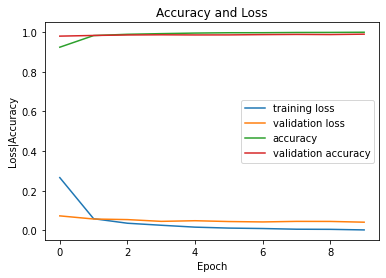

In [10]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03616216033697128, 0.9891999959945679]


Giá trị dự đoán:  7


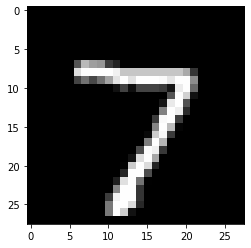

In [12]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))